In [1]:
from OU import * 
from fourier import * 
import time 

rng = np.random.default_rng(42)
from matplotlib.ticker import FuncFormatter

## I. Sanity check: Stein-Stein model 

### I.1. On the choice of $L$ and $\widetilde M$

In [140]:
x, kappa, theta, eta, rho = 0.25, 2, 0.25, 0.6, -0.7
n = 100 
T = 0.5
S0 = K = 1 

L_values = [4, 8, 16, 32]
M_values = [3, 5]
tilde_M_values = [np.arange(3, 10), np.arange(5, 13)]

i = 0
traj_M_0 = []
traj_M_CV_0 = []

for l, L in enumerate(tqdm(L_values)) : 
    traj_L = []
    traj_L_CV = []
    bell = compute_l_OU(x, kappa, theta, eta, M_values[0])
    for j, tilde_M in enumerate(tilde_M_values[i]) : 
        u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M_values[0], L, n, tilde_M)
        psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
        put = compute_europ_Fourier(psi, S0, K, flag="put")
        put_control_variate = compute_europ_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = 0.325, flag="put")
        traj_L.append(put)
        traj_L_CV.append(put_control_variate)
    traj_M_0.append(traj_L)
    traj_M_CV_0.append(traj_L_CV)

i = 1
traj_M_1 = []
traj_M_CV_1 = []
for l, L in enumerate(tqdm(L_values)) : 
    traj_L = []
    traj_L_CV = []
    bell = compute_l_OU(x, kappa, theta, eta, M_values[1])
    for j, tilde_M in enumerate(tilde_M_values[i]) : 
        u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M_values[1], L, n, tilde_M)
        psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
        put = compute_europ_Fourier(psi, S0, K, flag="put")
        put_control_variate = compute_europ_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = 0.325, flag="put")
        traj_L.append(put)
        traj_L_CV.append(put_control_variate)
    traj_M_1.append(traj_L)
    traj_M_CV_1.append(traj_L_CV)

traj_M_CV_0[-1][0] = traj_M_CV_0[0][0]
traj_M_0[-1][0] = traj_M_CV_0[0][0]

100%|█████████████████████████████████████████████| 4/4 [03:19<00:00, 49.90s/it]


In [142]:
u, _ = laggauss(180)
phi = compute_SteinStein_char_func(T, u, S0, x, kappa, theta, eta, rho) 
exact = compute_europ_Fourier_exact(phi, S0, K, flag="put")

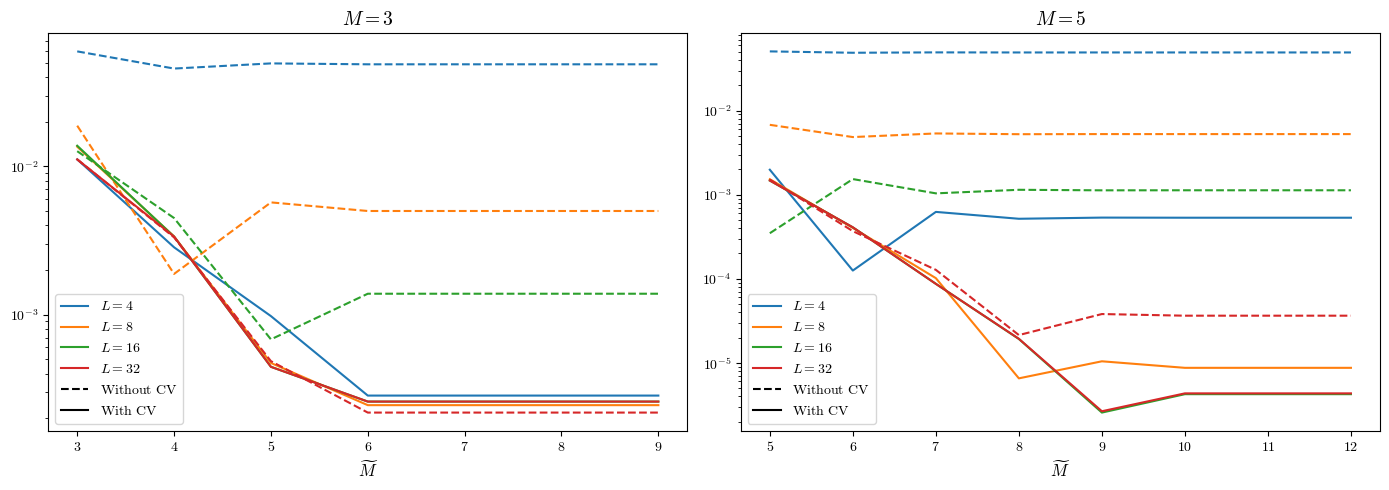

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(7*2, 5))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for l, L in enumerate(L_values) : 
    ax[0].semilogy(tilde_M_values[0], np.abs(exact-traj_M_0[l]), linestyle = "--", color = colors[l])
    ax[0].semilogy(tilde_M_values[0], np.abs(exact-traj_M_CV_0[l]), color = colors[l], label = fr"$L = {L}$")
    
for l, L in enumerate(L_values) : 
    ax[1].semilogy(tilde_M_values[1], np.abs(exact-traj_M_1[l]), linestyle = "--", color = colors[l])
    ax[1].semilogy(tilde_M_values[1], np.abs(exact-traj_M_CV_1[l]), color = colors[l], label = fr"$L = {L}$")

ax[0].set_xlabel(r"$\widetilde{M}$", fontsize=12)
ax[1].set_xlabel(r"$\widetilde{M}$", fontsize=12)
ax[0].set_title(fr"$M = {M_values[0]}$", fontsize=14)
ax[1].set_title(fr"$M = {M_values[1]}$", fontsize=14)

lims0 = ax[0].get_ylim()
lims1 = ax[1].get_ylim()

ax[0].plot(tilde_M_values[0], np.ones_like(tilde_M_values[0]), color = "black", label = r"$\text{Without CV}$", linestyle = "--")
ax[0].plot(tilde_M_values[0], np.ones_like(tilde_M_values[0]), color = "black", label = r"$\text{With CV}$")

ax[1].plot(tilde_M_values[1], np.ones_like(tilde_M_values[1]), color = "black", label = r"$\text{Without CV}$", linestyle = "--")
ax[1].plot(tilde_M_values[1], np.ones_like(tilde_M_values[1]), color = "black", label = r"$\text{With CV}$")

ax[0].set_ylim(lims0)
ax[1].set_ylim(lims1)

ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=10, loc = "lower left")
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=10, loc = "lower left")


ax[0].set_xticks(tilde_M_values[0])
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${int(x)}$"))
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"$10^{{{int(np.log10(y))}}}$"))

ax[1].set_xticks(tilde_M_values[1])
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${int(x)}$"))
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"$10^{{{int(np.log10(y))}}}$"))

plt.tight_layout()
#plt.savefig("L.pdf")
plt.show()

$\Longrightarrow$ On the sequel, we'll consider $\widetilde M = 2M$. Let us be more precise on the choice of the number of points in the Gauss-Laguerre troncature, namely $L$. At first glance, $L = 16$ seems to be enough. However, it is a little bit more intricate: it depends on the time to maturity. Take a look on the next numerical experiment. 

### I.2 Monte Carlo 

In [376]:
x, kappa, theta, eta, rho = 0.25, 2, 0.25, 0.6, -0.7
n = 100 
T = 0.5 
S0 = K = 1 

u, _ = laggauss(180)
phi = compute_SteinStein_char_func(T, u, S0, x, kappa, theta, eta, rho) 
exact = compute_europ_Fourier_exact(phi, S0, K, flag="put")

In [380]:
N_mc = 1000000
n_mc = 252 
Z = simulate_antithetic(N_mc, n_mc, 2)
S, _ = simulate_SteinStein(N_mc, n_mc, T, S0, x, kappa, theta, eta, rho, Z)
mc_mid, _, mc_lower, mc_upper = monte_carlo(np.maximum(K-S[:, -1], 0.0))

In [391]:
M = 5
L_values = np.arange(4, 33, 2)
values = []
bell = compute_l_OU(x, kappa, theta, eta, M)
sigma_BS = get_sigma_BS(bell, x, M, L, n, T, rho)
for L in tqdm(L_values) : 
    u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L, n)
    psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
    put = compute_europ_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = sigma_BS, flag="put")
    values.append(put) 

100%|███████████████████████████████████████████| 15/15 [00:37<00:00,  2.47s/it]


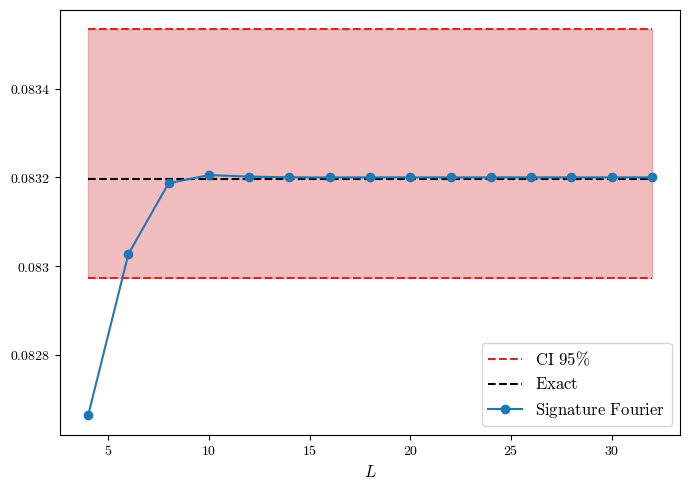

In [393]:
fig, ax = plt.subplots(figsize=(7,5))

ax.fill_between(L_values, mc_lower, mc_upper, color = "tab:red", alpha = 0.3) 
ax.plot(L_values, np.ones_like(L_values) * mc_lower, color = "tab:red", linestyle ="--", label = r"$\text{CI } 95\%$")
ax.plot(L_values, np.ones_like(L_values) * mc_upper, color = "tab:red", linestyle ="--")
ax.plot(L_values, np.ones_like(L_values) * exact, linestyle ="--", color = "black", label = r"$\text{Exact}$")
ax.plot(L_values, values, "o-", color = "tab:blue", label = r"$\text{Signature Fourier}$")

ax.set_xlabel(r"$L$", fontsize=12)
ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12)

plt.tight_layout()
#plt.savefig("L2.pdf")
plt.show()

### I.3 Stability of the CV method

In [74]:
x, kappa, theta, eta, rho = 0.25, 2, 0.25, 0.6, -0.7
n = 100 
T = 0.5 
S0 = K = 1 
L = 16
M = 5

N_mc = 1000000
n_mc = 252 
Z = simulate_antithetic(N_mc, n_mc, 2)
S, _ = simulate_SteinStein(N_mc, n_mc, T, S0, x, kappa, theta, eta, rho, Z)
mc_mid, _, mc_lower, mc_upper = monte_carlo(np.maximum(S[:, -1]-K, 0.0))

In [75]:
u, _ = laggauss(180)
phi = compute_SteinStein_char_func(T, u, S0, x, kappa, theta, eta, rho) 
exact = compute_europ_Fourier_exact(phi, S0, K, flag="call")

In [76]:
bell = compute_l_OU(x, kappa, theta, eta, M)
u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L, n)
psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)

sigma_BS_values = np.linspace(0.1, 0.9, 50)
S0 = K = 1
prices = []
for sig_CVBS in sigma_BS_values : 
    prices.append(compute_europ_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = sig_CVBS, flag="call"))
sigma_BS = get_sigma_BS(bell, x, M, L, n, T, rho)
estimated_price = compute_europ_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = sigma_BS, flag="call")

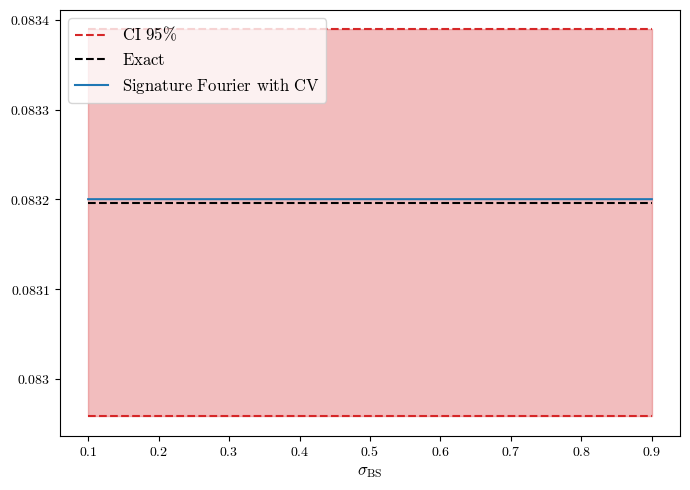

In [102]:
fig, ax = plt.subplots(figsize=(7,5))

ax.fill_between(sigma_BS_values, mc_lower, mc_upper, color = "tab:red", alpha = 0.3) 
ax.plot(sigma_BS_values, np.ones_like(sigma_BS_values) * mc_lower, color = "tab:red", linestyle ="--", label = r"$\text{CI } 95\%$")
ax.plot(sigma_BS_values, np.ones_like(sigma_BS_values) * mc_upper, color = "tab:red", linestyle ="--")
ax.plot(sigma_BS_values, np.ones_like(sigma_BS_values) * exact, color = "black", linestyle ="--", label = r"$\text{Exact}$")
ax.plot(sigma_BS_values, prices, lw = 1.5, color = "tab:blue", label = r"$\text{Signature Fourier with CV}$")

ax.set_xlabel(r"$\sigma_{\text{BS}}$", fontsize=12)
ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(loc = "upper left", fontsize=12)

plt.tight_layout()
plt.show()

## II. Computation time

In [895]:
L = 16
u, _ = laggauss(L)
T = 1

### II. 1. Stein-Stein

In [909]:
x = 0.05
kappa = 1 
theta = 0.25 
eta = 1.2
S0 = 1
rho = -0.7
start = time.time()
compute_SteinStein_char_func(T, u, S0, x, kappa, theta, eta, rho) 
print(time.time()-start)

0.0007708072662353516


### II. 2. Heston

In [912]:
x = 0.5 
v = x**2
kappa = 1 
theta = 0.25
eta = 0.7
S0 = 1 
rho = -0.7
start = time.time()
compute_Heston_char_func(T, u, S0, x, kappa, theta, eta, rho)
print(time.time()-start)

0.0003669261932373047


### II. 3. Signature volatility model 

In [928]:
n = 100
x = 0.1
for M in range(1, 6) : 
    l = np.random.uniform(size = 2**(M+1) - 2)
    start = time.time()
    u, sigma, sigma_2, projectors, tuples = offline_procedure(l, x, M, L, n)
    psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
    phi = np.exp(psi[:, 0, 0])
    print(fr"M = {M} : ", time.time()-start)  

M = 1 :  0.006815910339355469
M = 2 :  0.009037256240844727
M = 3 :  0.025915145874023438
M = 4 :  0.1922607421875
M = 5 :  2.6866519451141357


## III. Implied volatility 

### III.1. Stein-Stein

In [422]:
T_values = [1/52, 1/12, 3/12, 6/12, 1]

x, kappa, theta, eta, rho = 0.25, 1, 0.25, 1.2, -0.5
K = 1
S_0 = 1
N_mc = 1000000
n_mc = 252 
Z = simulate_antithetic(N_mc, n_mc, 2) 

logmoneyness_values = [
    np.linspace(-0.06, 0.03, 40),   
    np.linspace(-0.115, 0.045, 40),
    np.linspace(-0.21, 0.09, 40), 
    np.linspace(-0.3, 0.14, 40), 
    np.linspace(-0.45, 0.21, 40)]

L_values = [40, 40, 40, 16, 16]
M = 4
n = 100

bell = compute_l_OU(x, kappa, theta, eta, M)

sigma_BS_values = []
psi_sig_values = []
ivs_sig = []
phi_exact_values = []
ivs_exact = []
ivs_mid = []
ivs_lower = []
ivs_upper = []

u_exact, _ = laggauss(180) 

for i, T in enumerate(tqdm(T_values)) :
    u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L_values[i], n)
    sigma_BS_values.append(get_sigma_BS(bell, x, M, L_values[i], n, T, rho))
    psi_sig_values.append(compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples))
    ivs_sig.append(compute_IV_Sig(logmoneyness_values[i], T, S_0, psi_sig_values[i], sigma_BS_values[i]))
    phi_exact_values.append(compute_SteinStein_char_func(T, u_exact, S_0, x, kappa, theta, eta, rho))
    ivs_exact.append(compute_IV_Exact(logmoneyness_values[i], T, S_0, phi_exact_values[i]))
    S, _ = simulate_SteinStein(N_mc, n_mc, T, S0, x, kappa, theta, eta, rho, Z)
    iv_mid, iv_lower, iv_upper = compute_IV_MC(logmoneyness_values[i], T, S_0, S[:, -1])
    ivs_mid.append(iv_mid)
    ivs_lower.append(iv_lower)
    ivs_upper.append(iv_upper)

100%|█████████████████████████████████████████████| 5/5 [00:17<00:00,  3.52s/it]


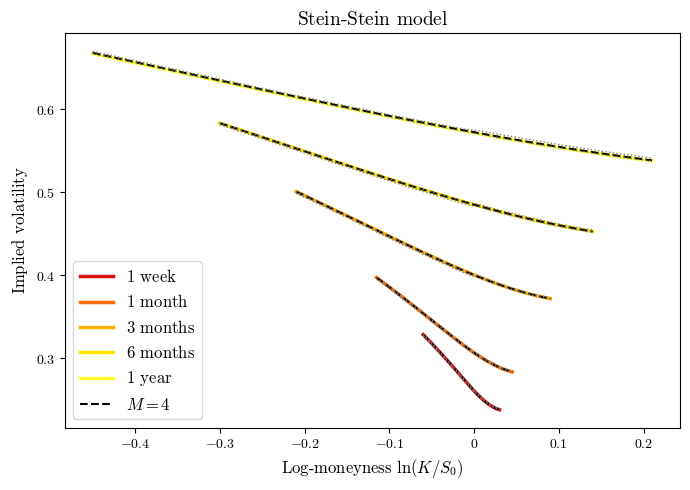

In [424]:
colors = ["#d41111", "#ff6f00", "#ffb000", "#ffe600", "#ffff33"]

labels = [r"$\text{1 week}$", r"$\text{1 month}$", r"$\text{3 months}$", r"$\text{6 months}$", r"$\text{1 year}$"]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

for i, T in enumerate(T_values) : 
    ax.plot(logmoneyness_values[i], ivs_sig[i], lw = 2.5, color = colors[i], label = labels[i])
    ax.plot(logmoneyness_values[i], ivs_exact[i], color = "black", linestyle = "--", label = fr"$M = {M}$") if i == len(T_values)-1 else ax.plot(logmoneyness_values[i], ivs_exact[i], color = "black", linestyle = "--")
    ax.plot(logmoneyness_values[i], ivs_lower[i], color = "gray", linestyle = ":", lw = 1)
    ax.plot(logmoneyness_values[i], ivs_upper[i], color = "gray", linestyle = ":", lw = 1)
    
ax.set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax.set_ylabel(r"$\text{Implied volatility}$", fontsize=12)

ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12)

ax.set_title(r"$\text{Stein-Stein model}$", fontsize=14)

plt.tight_layout()
plt.show()

### III.2. Heston

In [455]:
T_values = [1/52, 1/12, 3/12, 6/12, 1]
v, kappa, theta, eta, rho = 0.25, 1, 0.25, 0.7, -0.7
S_0 = K = 1 
N_mc = 500000
n_mc = 252 
Z = simulate_antithetic(N_mc, n_mc, 2) 

logmoneyness_values = [
    np.linspace(-0.06, 0.03, 40),   
    np.linspace(-0.115, 0.045, 40),
    np.linspace(-0.21, 0.09, 40), 
    np.linspace(-0.3, 0.14, 40), 
    np.linspace(-0.45, 0.21, 40)]

In [457]:
L_values = [40, 40, 40, 16, 16]
M = 4
n = 100

sigma_CIR, _, _, _ = compute_sigma_CIR(v, kappa, theta, eta, M, verbose=False)

In [459]:
bell = dict_to_vector(sigma_CIR, 2, M) 

sigma_BS_values = []
psi_sig_values = []
ivs_sig = []
phi_exact_values = []
ivs_exact = []
ivs_mid = []
ivs_lower = []
ivs_upper = []

u_exact, _ = laggauss(180) 

for i, T in enumerate(tqdm(T_values)) :
    u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, np.sqrt(v), M, L_values[i], n)
    sigma_BS_values.append(get_sigma_BS(bell, np.sqrt(v), M, L_values[i], n, T, rho))
    psi_sig_values.append(compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples))
    ivs_sig.append(compute_IV_Sig(logmoneyness_values[i], T, S_0, psi_sig_values[i], sigma_BS_values[i]))
    phi_exact_values.append(compute_Heston_char_func(T, u_exact, S_0, np.sqrt(v), kappa, theta, eta, rho))
    ivs_exact.append(compute_IV_Exact(logmoneyness_values[i], T, S_0, phi_exact_values[i]))
    """S, _ = simulate_heston(N_mc, n_mc, Z, S0, v, T, 0, kappa, theta, eta, rho)
    iv_mid, iv_lower, iv_upper = compute_IV_MC(logmoneyness_values[i], T, S_0, S[:, -1])
    ivs_mid.append(iv_mid)
    ivs_lower.append(iv_lower)
    ivs_upper.append(iv_upper)"""

100%|█████████████████████████████████████████████| 5/5 [00:29<00:00,  5.86s/it]


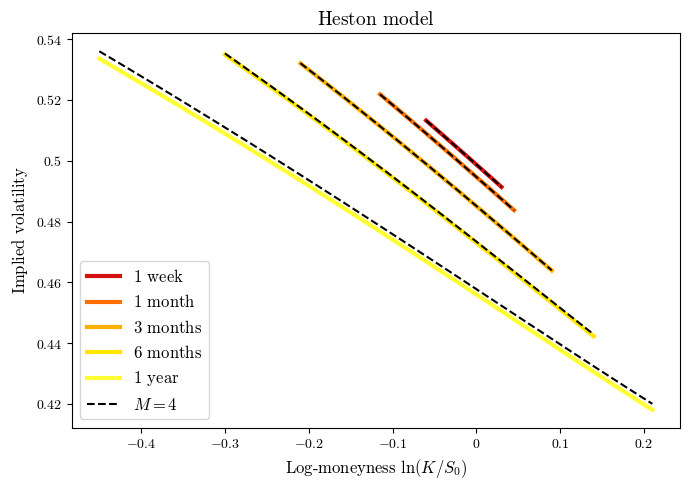

In [463]:
colors = ["#d41111", "#ff6f00", "#ffb000", "#ffe600", "#ffff33"]

labels = [r"$\text{1 week}$", r"$\text{1 month}$", r"$\text{3 months}$", r"$\text{6 months}$", r"$\text{1 year}$"]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

for i, T in enumerate(T_values) : 
    ax.plot(logmoneyness_values[i], ivs_sig[i], lw = 3, color = colors[i], label = labels[i])
    ax.plot(logmoneyness_values[i], ivs_exact[i], color = "black", linestyle = "--", label = fr"$M = {M}$") if i == len(T_values)-1 else ax.plot(logmoneyness_values[i], ivs_exact[i], color = "black", linestyle = "--")
    #ax.plot(logmoneyness_values[i], ivs_lower[i], color = "gray", linestyle = ":", lw = 1)
    #ax.plot(logmoneyness_values[i], ivs_upper[i], color = "gray", linestyle = ":", lw = 1)

ax.set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax.set_ylabel(r"$\text{Implied volatility}$", fontsize=12)

ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12, loc = "lower left")

ax.set_title(r"$\text{Heston model}$", fontsize=14)

plt.tight_layout() 
plt.show()

### III.3. Hull-White

 For Monte Carlo simulations, it is better to have explicit processes. When $\alpha \neq 0$, the mGBM solution can also be formulated explicitly with
        \begin{align}
            Y_t := \left( y + \frac{\eta}{\alpha} + \kappa \left( \theta + \frac{\eta}{\alpha} \right) \int_0^t e^{\left( \kappa + \frac{\alpha^2}{2} \right) s - \alpha W_s} \,d s \right) e^{-\left( \kappa + \frac{\alpha^2}{2} \right) t + \alpha W_t} - \frac{\eta}{\alpha}.
        \end{align}
        When $\alpha = 0$, the mGBM is an Ornstein-Uhlenbeck process.

Use case: Hull-White model ($\kappa=1, \theta=0.25, \eta=0, \alpha=0.4$ and $\rho=-0.5711$) (logmoneyness  $=\ln(K/S_0)$)

In [426]:
T_values = [1/52, 1/12, 3/12, 6/12, 1]
y, kappa, theta, eta, alpha, rho = 0.25, 1, 0.25, 0, 0.4, -0.5711 

N_mc = 1000000
n_mc = 252 

S_0 = K = 1 

logmoneyness_values = [
    np.linspace(-0.06, 0.03, 40),   
    np.linspace(-0.115, 0.045, 40),
    np.linspace(-0.21, 0.09, 40), 
    np.linspace(-0.3, 0.14, 40), 
    np.linspace(-0.45, 0.21, 40)]

ivs_mid = []
ivs_lower = []
ivs_upper = []

for i, T in enumerate(tqdm(T_values)) : 
    W_2d = generate_brownian_2d_paths(N_mc, n_mc, T, rho, antithetic=True)
    S, Y = simulate_mGBM_volatility_model(S_0, y, T, kappa, theta, eta, alpha, W_2d)
    iv_mid, iv_lower, iv_upper = compute_IV_MC(logmoneyness_values[i], T, S_0, S[:, -1])
    ivs_mid.append(iv_mid)
    ivs_lower.append(iv_lower)
    ivs_upper.append(iv_upper)

100%|█████████████████████████████████████████████| 5/5 [01:46<00:00, 21.21s/it]


In [438]:
M = 4 
n = 100
L_values = [40, 40, 40, 16, 16]

sigma_BS_values = []
psi_sig_values = []
ivs_sig = []

bell = compute_l_mGBM(y, kappa, theta, eta, alpha, M)

for i, T in enumerate(tqdm(T_values)) :
    u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L_values[i], n)
    sigma_BS_values.append(get_sigma_BS(bell, x, M, L, n, T, rho))
    psi_sig_values.append(compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples))
    ivs_sig.append(compute_IV_Sig(logmoneyness_values[i], T, S_0, psi_sig_values[i], sigma_BS_values[i]))

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.36it/s]


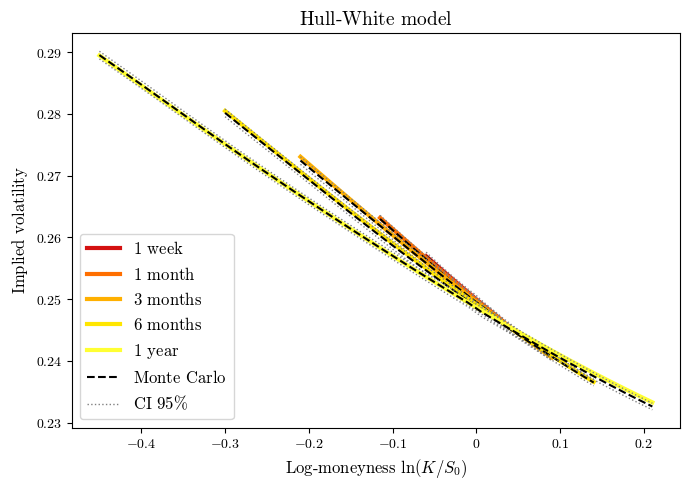

In [463]:
colors = ["#d41111", "#ff6f00", "#ffb000", "#ffe600", "#ffff33"]

labels = [r"$\text{1 week}$", r"$\text{1 month}$", r"$\text{3 months}$", r"$\text{6 months}$", r"$\text{1 year}$"]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

for i, T in enumerate(T_values) : 
    ax.plot(logmoneyness_values[i], ivs_sig[i], lw=3, color = colors[i], label = labels[i])
    ax.plot(logmoneyness_values[i], ivs_mid[i], color = "black", linestyle ="--") if i < len(T_values)-1 else ax.plot(logmoneyness_values[i], ivs_mid[i], color = "black", linestyle ="--", label = r"$\text{Monte Carlo}$")
    ax.plot(logmoneyness_values[i], ivs_lower[i], color = "gray", linestyle =":", lw = 1) if i < len(T_values)-1 else ax.plot(logmoneyness_values[i], ivs_lower[i], color = "gray", linestyle =":", lw = 1, label = r"$\text{CI } 95\%$")
    ax.plot(logmoneyness_values[i], ivs_upper[i], color = "gray", linestyle =":", lw = 1)   

ax.set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax.set_ylabel(r"$\text{Implied volatility}$", fontsize=12)

ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12, loc = "lower left")

ax.set_title(r"$\text{Hull-White model}$", fontsize=14)

plt.tight_layout()
plt.show()

### III.4. Drawn at random 

$$[x, \mathbb R, \geq 0, \mathbb R, \geq0 ,\mathbb R, 0, \mathbb R, \geq0, \mathbb R, 0, \mathbb R, 0, \mathbb R, 0]$$

In [3]:
sample_real = rng.uniform(-0.5, 0.5, size=(7))
sample_positive = rng.uniform(0.0, 0.5, size=(3))
bell = np.array([sample_real[0], sample_positive[0], sample_real[1], sample_positive[1], sample_real[2], 
                 0.0, sample_real[3], sample_positive[2], sample_real[4], 0.0, sample_real[5], 0.0, sample_real[6], 0.0])

In [942]:
bell

array([ 0.27395605,  0.39303215, -0.06112156,  0.06405682,  0.35859792,
        0.        ,  0.19736803,  0.22519297, -0.40582265,  0.        ,
        0.47562235,  0.        ,  0.2611397 ,  0.        ])

In [932]:
T_values = [1/52, 1/12, 3/12, 6/12, 1]

x, kappa, theta, eta, rho = 0.25, 1, 0.25, 1.2, -0.5
S_0 = K = 1 
M = 3 

logmoneyness_values = [
    np.linspace(-0.06, 0.03, 40),   
    np.linspace(-0.115, 0.045, 40),
    np.linspace(-0.21, 0.09, 40), 
    np.linspace(-0.3, 0.14, 40), 
    np.linspace(-0.45, 0.21, 40)]

In [936]:
N_mc = 100000
n_mc = 252

ivs_mid = []
ivs_lower = []
ivs_upper = []

for i, T in enumerate(tqdm(T_values)) : 
    W, paths = generate_paths(N_mc, n_mc, T, rng=rng)
    sigma = simulate_sigma(M, x, T, paths, bell, verbose=False)
    tilde_B = generate_brownian_paths(N_mc, n_mc, T, rng=rng) 
    B = rho * W + np.sqrt(1 - rho**2) * tilde_B 
    S = simulate_S_from_sigma(sigma, B, S_0, T)
    iv_mid, iv_lower, iv_upper = compute_IV_MC(logmoneyness_values[i], T, S_0, S[:, -1])
    ivs_mid.append(iv_mid)
    ivs_lower.append(iv_lower)
    ivs_upper.append(iv_upper)

100%|█████████████████████████████████████████████| 5/5 [02:59<00:00, 35.81s/it]


In [938]:
L_values = [40, 40, 40, 16, 16]
n = 100

sigma_BS_values = []
psi_sig_values = []
ivs_sig = []

for i, T in enumerate(tqdm(T_values)) :
    u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L_values[i], n)
    sigma_BS_values.append(get_sigma_BS(bell, x, M, L_values[i], n, T, rho))
    psi_sig_values.append(compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples))
    ivs_sig.append(compute_IV_Sig(logmoneyness_values[i], T, S_0, psi_sig_values[i], sigma_BS_values[i]))

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 16.92it/s]


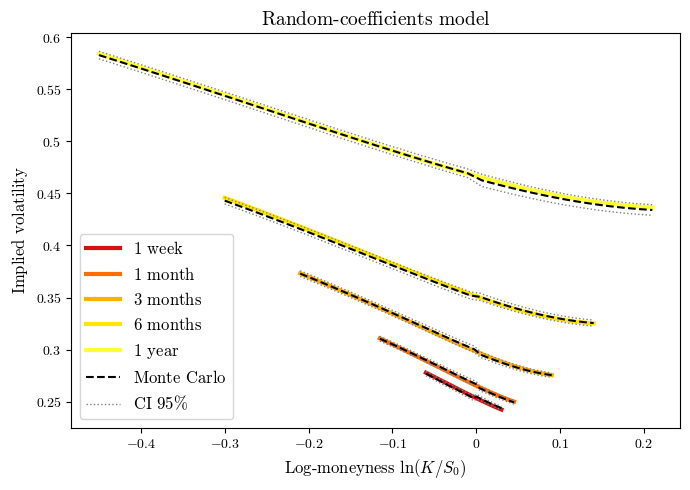

In [940]:
colors = ["#d41111", "#ff6f00", "#ffb000", "#ffe600", "#ffff33"]

labels = [r"$\text{1 week}$", r"$\text{1 month}$", r"$\text{3 months}$", r"$\text{6 months}$", r"$\text{1 year}$"]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

for i, T in enumerate(T_values) : 
    ax.plot(logmoneyness_values[i], ivs_sig[i], lw=3, color = colors[i], label = labels[i])
    ax.plot(logmoneyness_values[i], ivs_mid[i], color = "black", linestyle ="--") if i < len(T_values)-1 else ax.plot(logmoneyness_values[i], ivs_mid[i], color = "black", linestyle ="--", label = r"$\text{Monte Carlo}$")
    ax.plot(logmoneyness_values[i], ivs_lower[i], color = "gray", linestyle =":", lw = 1) if i < len(T_values)-1 else ax.plot(logmoneyness_values[i], ivs_lower[i], color = "gray", linestyle =":", lw = 1, label = r"$\text{CI } 95\%$")
    ax.plot(logmoneyness_values[i], ivs_upper[i], color = "gray", linestyle =":", lw = 1)   
ax.set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax.set_ylabel(r"$\text{Implied volatility}$", fontsize=12)

ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12, loc = "lower left")

ax.set_title(r"$\text{Random-coefficients model}$", fontsize=14)

plt.tight_layout()
plt.show()

## IV. $q$-Volatility swaps

In [3]:
x = 0.25
kappa = 1 
theta = 0.25
eta = 1.2
rho = -0.7

In [5]:
#T_values = np.array([1/52, 1/12, 3/12, 6/12, 1])
T_values = np.linspace(1/52, 1, 20)
L_values = [185, 185, 185, 185, 185]
L_values = np.ones_like(T_values, dtype=int) * 50 

U_max = 50

M = 4
n = 100
q = 0.5

bell = compute_l_OU(x, kappa, theta, eta, M)

values_sig = []

for i, T in enumerate(tqdm(T_values)) : 
    u, w =  gauss_legendre_interval(L_values[i], np.sqrt(U_max))
    _, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L_values[i], n)
    psi = compute_psi_vol_swap(T, rho, u**2, sigma, sigma_2, projectors, tuples)
    values_sig.append(compute_vol_swap(u, w, psi, U_max))

100%|███████████████████████████████████████████| 20/20 [00:07<00:00,  2.80it/s]


In [7]:
M = 12
bell = compute_l_OU(x, kappa, theta, eta, M, intercept=True)

bell_dict = vector_to_dict_full(bell, 2, M)
bell_2 = shuffle(bell_dict, bell_dict, M) 
l = concat(bell_2, {(1,) : 1}, M)
l_vector = dict_to_vector_full(l, 2, M)

values_sig_2 = [] 
for T in tqdm(T_values) : 
    WW = expected_signature_bm(T, M)
    values_sig_2.append(1/T * np.dot(l_vector, WW))

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 650.72it/s]


In [9]:
N_mc = 500000
n_mc = 252 

values_mc_1 = []
values_mc_lower_1 = []
values_mc_upper_1 = []

values_mc_2 = []
values_mc_lower_2 = []
values_mc_upper_2 = []

for i, T in enumerate(tqdm(T_values)) : 
    W = generate_brownian_paths(N_mc, n_mc, T, antithetic=True)
    X = simulate_OU_euler(x, T, kappa, theta, eta, W)
    V_T = compute_integrated_variance(X, T)
    
    sample = np.sqrt(V_T / T)
    mid, _, lower, upper = monte_carlo(sample) 
    values_mc_1.append(mid)
    values_mc_lower_1.append(lower)
    values_mc_upper_1.append(upper)

    sample = V_T / T
    mid, _, lower, upper = monte_carlo(sample) 
    values_mc_2.append(mid)
    values_mc_lower_2.append(lower)
    values_mc_upper_2.append(upper)

100%|███████████████████████████████████████████| 20/20 [01:21<00:00,  4.10s/it]


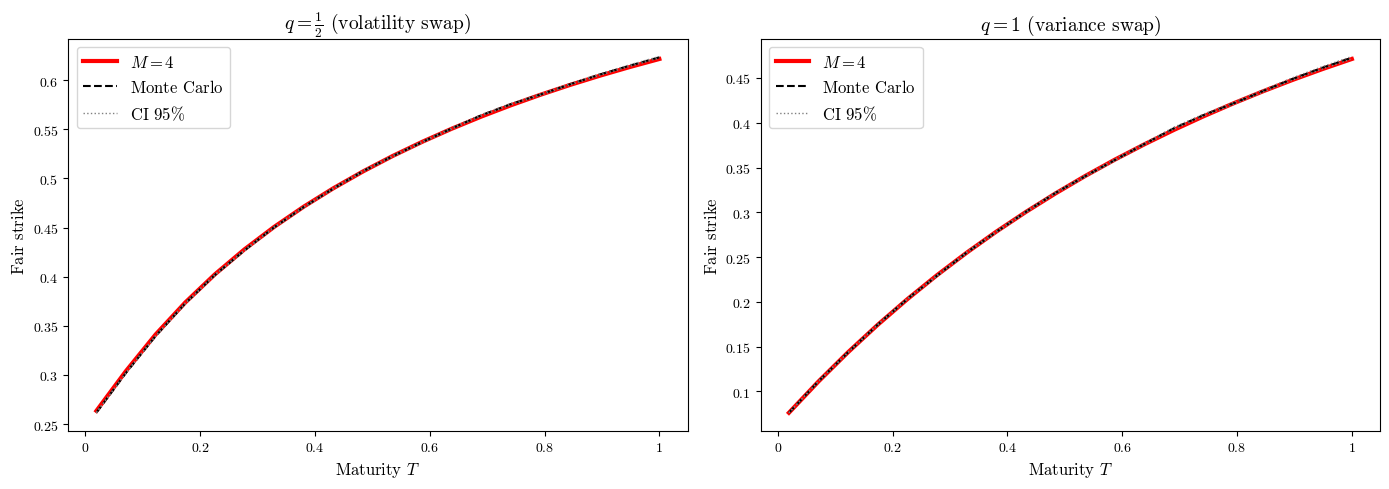

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(7*2, 5))

ax[0].plot(T_values, values_sig, label = r"$M = 4$", color = "red", linewidth = 3)
ax[0].plot(T_values, values_mc_1, label = r"$\text{Monte Carlo}$", color = "black", linestyle ="--")
ax[0].plot(T_values, values_mc_lower_1, label = r"$\text{CI } 95\%$", color = "gray", linestyle =":", lw = 1)
ax[0].plot(T_values, values_mc_upper_1, color = "gray", linestyle =":", lw = 1)

ax[1].plot(T_values, values_sig_2, label = r"$M = 4$", color = "red", linewidth = 3)
ax[1].plot(T_values, values_mc_2, label = r"$\text{Monte Carlo}$", color = "black", linestyle ="--")
ax[1].plot(T_values, values_mc_lower_2, label = r"$\text{CI } 95\%$", color = "gray", linestyle =":", lw = 1)
ax[1].plot(T_values, values_mc_upper_2, color = "gray", linestyle =":", lw = 1)

ax[0].set_xlabel(r"$\text{Maturity } T$", fontsize=12)
ax[0].set_ylabel(r"$\text{Fair strike}$", fontsize=12)
ax[0].set_title(r"$q =\frac{1}{2} \text{ (volatility swap)}$", fontsize=14)

ax[1].set_xlabel(r"$\text{Maturity } T$", fontsize=12)
ax[1].set_ylabel(r"$\text{Fair strike}$", fontsize=12)
ax[1].set_title(r"$q =1 \text{ (variance swap)}$", fontsize=14)

ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=12, loc = "upper left")

ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=12, loc = "upper left")

plt.tight_layout()
plt.show()

## V. Market calibration

### V.1. Heston model 

In [605]:
theta = 0.0398
kappa = 1.5768
eta = 0.5751
rho = -0.5711
r=0.
K = 1. 
s0 = 1.
V0 = 0.0175
ref_value_T1y = 0.05785155435         # See fang osterlee 
ref_value_T10y = 0.22318945791474590  # See fang osterlee 

u, _ = laggauss(160)
phi = compute_Heston_char_func(1, u, s0, np.sqrt(V0), kappa, theta, eta, rho)
print("Error ref1 : ", np.abs(compute_europ_Fourier_exact(phi, s0, K, flag="put") - ref_value_T1y))
phi = compute_Heston_char_func(10, u, s0, np.sqrt(V0), kappa, theta, eta, rho)
print("Error ref2 : ", np.abs(compute_europ_Fourier_exact(phi, s0, K, flag="put")-ref_value_T10y))

Error ref1 :  1.9833024111903796e-12
Error ref2 :  5.172723360757914e-12


In [607]:
T = 1 
logmoneyness = np.linspace(-0.45, 0.21, 50)
u, _ = laggauss(160)
phi = compute_Heston_char_func(T, u, s0, np.sqrt(V0), kappa, theta, eta, rho)
ivs_values = compute_IV_Exact(logmoneyness, T, S0, phi)

In [ ]:
bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-0.8, 0.8))
bounds.append((-1, -0.1))

ivs_market = ivs_values
vegas_market = np.ones_like(ivs_market) 

x = np.sqrt(V0) 

M = 3
L = 16
n = 100

maxiter = 100
popsize = 15

result_DE, result_NM = calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=False)

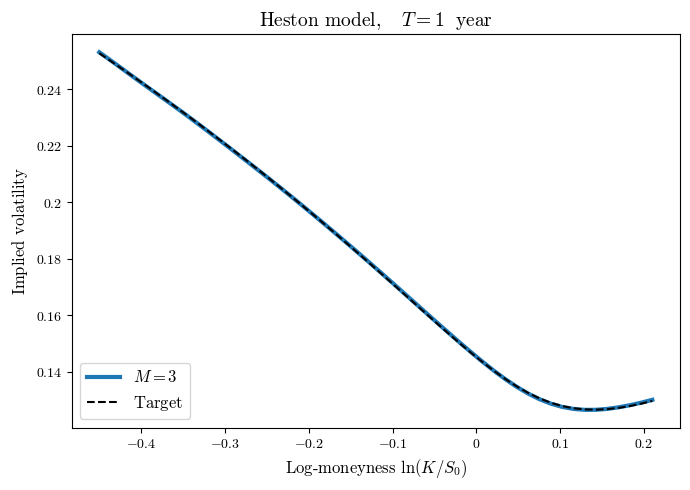

In [677]:
plot_IV_raw(logmoneyness, ivs_market, result_NM.x, x, M, L, n, T, title =r"\text{Heston model}, \quad T = 1\; \text{ year}", save=False)

In [679]:
result_NM.x

array([-0.27060781,  0.31787848,  0.20889235, -0.22309889, -0.0267424 ,
        0.12750176,  0.29120277, -0.04717341,  0.16154474,  0.09743888,
       -0.08050274, -0.09974347, -0.29207987, -0.09867162, -0.65405025])

### V.2. Quintic OU model

In [705]:
N_mc = 1000000
n_mc = 252 

T = 30/365
S0 = 1
T_values = [9/365, 30/365] 
logmoneyness_values = [
    np.linspace(-0.135, 0.03, 50),
    np.linspace(-0.22, 0.05, 50)]

H = -0.1382
alphas = np.array([0.88169, 0.274, 0, 0.1717, 0.0, 0.0036])
rho  = -0.7316
a, b, c = 0.0084, 2.0436, 0.0441

Z = simulate_antithetic(N_mc, n_mc, d=2)

ivs_mid = []
ivs_lower = []
ivs_upper = []

for i, T in enumerate(T_values) : 
    t_grid = np.linspace(0, T, n_mc+1) 
    xi = a * np.exp(-b*t_grid) + c*(1-np.exp(-b*t_grid))
    S, sig = simulate_Quintic(N_mc, n_mc, T, H, eps, S0, rho, xi, alphas, Z) 
    iv_mid, iv_lower, iv_upper = compute_IV_MC(logmoneyness_values[i], T, S0, S[:, -1])
    ivs_mid.append(iv_mid)
    ivs_lower.append(iv_lower)
    ivs_upper.append(iv_upper)

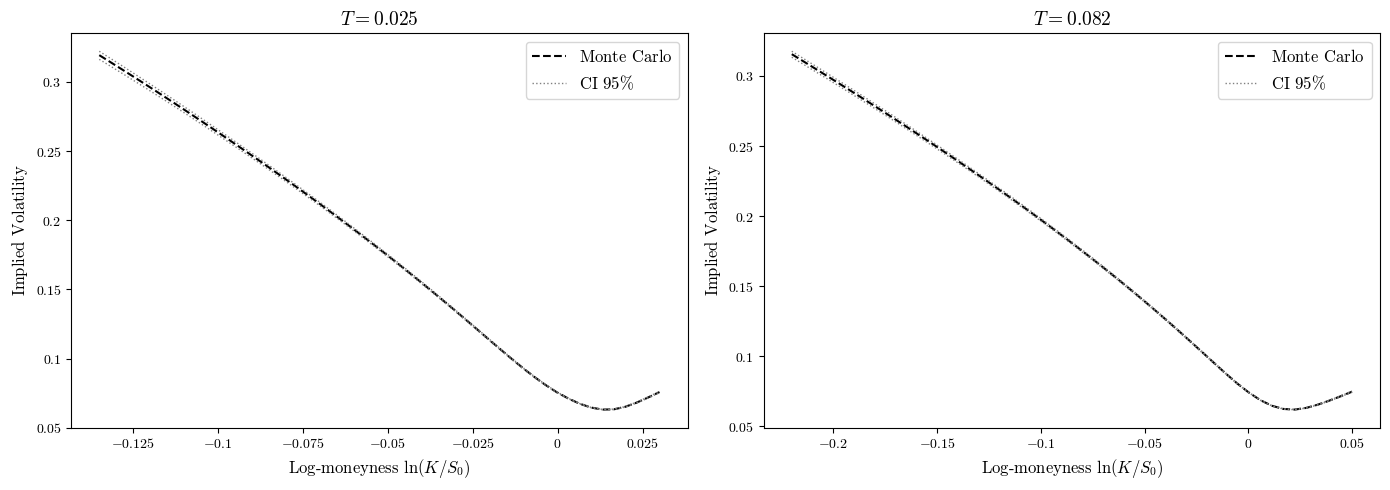

In [707]:
fig, ax = plt.subplots(1, 2, figsize=(7*2, 5))
for i in range(2) : 
    ax[i].plot(logmoneyness_values[i], ivs_mid[i], linestyle="--", color ="black", label = r"$\text{Monte Carlo}$")
    ax[i].plot(logmoneyness_values[i], ivs_lower[i], linestyle=":", color ="gray", lw=1, label = r"$\text{CI } 95\%$")
    ax[i].plot(logmoneyness_values[i], ivs_upper[i], linestyle=":", color ="gray", lw=1)
    ax[i].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
    ax[i].set_ylabel(r"$\text{Implied Volatility}$", fontsize=12)
    ax[i].set_title(fr"$T = {np.round(T_values[i], 3)}$", fontsize=14)
    ax[i].legend(fontsize=12)
    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")

plt.tight_layout()
plt.show()

#### V.2.1. $T = 9$ days

In [845]:
T = 9/365
x = np.sqrt(a) 
ivs_market = ivs_mid[0]
logmoneyness = logmoneyness_values[0]
vegas_market = np.ones_like(ivs_market)

M = 3
n = 100
L = 128

bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-5, 5))
bounds.append((-1, -0.1))

maxiter = 100
popsize = 15

In [ ]:
result_DE, result_NM =  calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=True)

In [ ]:
theta = result_NM.x 

In [862]:
theta

array([-8.59887921,  0.38381553, -1.47984547,  7.54326354,  1.08116644,
        6.59934411,  7.94972246, -2.67830985, -0.76145388,  5.73925338,
       -9.86895455,  1.77852861,  7.01950044,  0.30462102, -0.78394557])

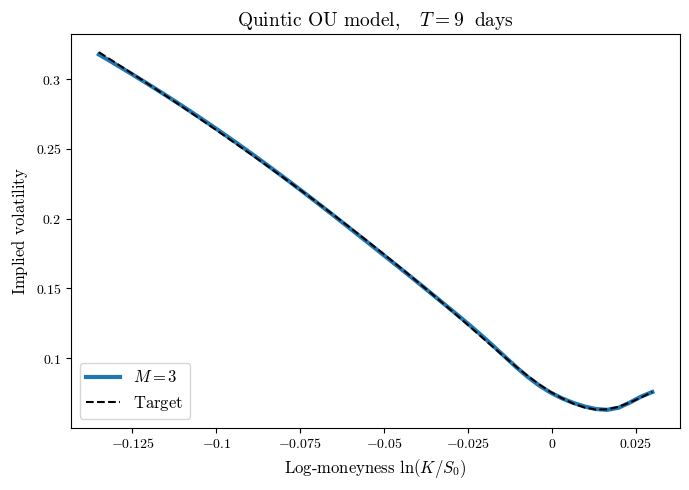

In [865]:
plot_IV_raw(logmoneyness, ivs_market, theta, x, M, L, n, T, title = r"\text{Quintic OU model}, \quad T = 9\; \text{ days}", save=False)

In [ ]:
"""
array([-8.59887921,  0.38381553, -1.47984547,  7.54326354,  1.08116644,
        6.59934411,  7.94972246, -2.67830985, -0.76145388,  5.73925338,
       -9.86895455,  1.77852861,  7.01950044,  0.30462102, -0.78394557])
"""

#### V.2.2. $T = 30$ days

In [764]:
T = 30/365
x = np.sqrt(a) 
ivs_market = ivs_mid[1]
logmoneyness = logmoneyness_values[1]
vegas_market = np.ones_like(ivs_market)

M = 3
n = 100
L = 45

bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-5, 5))
bounds.append((-1, -0.1))

maxiter = 100
popsize = 15 

In [ ]:
result_DE, result_NM =  calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=True)

In [ ]:
theta = result_NM.x 

In [793]:
theta

array([-2.26788245e+00,  1.70636792e-01, -1.14137051e+01,  1.35807836e+00,
        6.90602737e-01,  1.77115083e+00,  8.58450835e-01, -1.15516282e+01,
       -2.66584457e+01, -2.04055989e+00,  2.47127835e-02,  7.09513023e+00,
        2.22719491e+01,  1.35654657e+00, -9.00188104e-01])

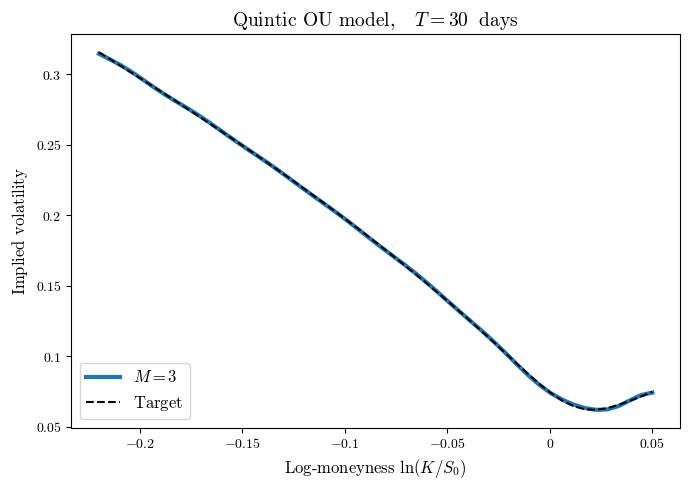

In [795]:
plot_IV_raw(logmoneyness, ivs_market, theta, x, M, L, n, T, title = r"\text{Quintic OU model}, \quad T = 30\; \text{ days}", save=False)

In [17]:
"""
array([-2.26788245e+00,  1.70636792e-01, -1.14137051e+01,  1.35807836e+00,
        6.90602737e-01,  1.77115083e+00,  8.58450835e-01, -1.15516282e+01,
       -2.66584457e+01, -2.04055989e+00,  2.47127835e-02,  7.09513023e+00,
        2.22719491e+01,  1.35654657e+00, -9.00188104e-01])
"""

'\narray([-2.26788245e+00,  1.70636792e-01, -1.14137051e+01,  1.35807836e+00,\n        6.90602737e-01,  1.77115083e+00,  8.58450835e-01, -1.15516282e+01,\n       -2.66584457e+01, -2.04055989e+00,  2.47127835e-02,  7.09513023e+00,\n        2.22719491e+01,  1.35654657e+00, -9.00188104e-01])\n'

### V.3. Market data: SPX 

In [867]:
df = pd.read_csv('spx_options_2017_05_19.csv', sep=',')
SPX = prepare_raw_data(df)

In [868]:
print("Available maturities: ", sorted(np.array(SPX["TimeToExpiration"].unique())))

Available maturities:  [3, 5, 7, 11, 12, 14, 17, 19, 21, 24, 26, 28, 31, 33, 35, 38, 40, 42, 49, 56, 63, 73]


#### V.3.1. $T = 7$ days

In [835]:
SPX_ = SPX[SPX["TimeToExpiration"] == 7]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.155] # to avoid outliers
SPX_ = SPX_[SPX_["Logmoneyness"] < 0.03]

ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(logmoneyness) 

x = 0.1204
M = 3
n = 100
L = 160
T = np.array(SPX_["Maturity"])[0]

bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-5, 5))
bounds.append((-1, -0.1))

maxiter = 100
popsize = 15

In [ ]:
result_DE, result_NM =  calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=False)

In [ ]:
theta = result_NM.x

In [843]:
theta 

array([-1.11090329e+01,  9.02498015e-01,  7.24298581e+00, -2.18768051e+01,
       -5.80765897e+01,  8.48592250e+00,  8.52193283e+00, -1.29333848e-01,
       -5.51958888e-02,  4.09734939e+01, -2.22484438e+00, -8.16654387e-01,
        1.55770972e+01,  2.72864125e+01, -8.38266027e-01])

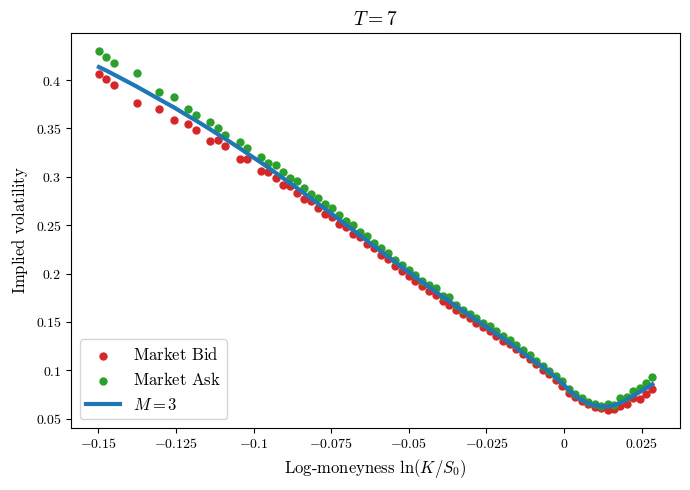

In [837]:
plot_IV(SPX_, result_NM.x, x, M, L, n, T, save=False)

In [839]:
"""
array([-1.11090329e+01,  9.02498015e-01,  7.24298581e+00, -2.18768051e+01,
       -5.80765897e+01,  8.48592250e+00,  8.52193283e+00, -1.29333848e-01,
       -5.51958888e-02,  4.09734939e+01, -2.22484438e+00, -8.16654387e-01,
        1.55770972e+01,  2.72864125e+01, -8.38266027e-01])
"""

'\narray([-1.11090329e+01,  9.02498015e-01,  7.24298581e+00, -2.18768051e+01,\n       -5.80765897e+01,  8.48592250e+00,  8.52193283e+00, -1.29333848e-01,\n       -5.51958888e-02,  4.09734939e+01, -2.22484438e+00, -8.16654387e-01,\n        1.55770972e+01,  2.72864125e+01, -8.38266027e-01])\n'

#### V.3.2. $T = 14$ days

In [489]:
SPX_ = SPX[SPX["TimeToExpiration"] == 14]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.20] # to avoid outliers
SPX_ = SPX_[SPX_["Logmoneyness"] < 0.045]

ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(logmoneyness) 

x = 0.1204
M = 3
n = 100
L = 128
T = np.array(SPX_["Maturity"])[0]

bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-5, 5))
bounds.append((-1, -0.1))

maxiter = 100
popsize = 15

In [ ]:
result_DE, result_NM =  calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=False)

In [493]:
result_DE.x

array([-4.9888091 ,  0.50491326, -2.23075206, -4.84029332, -4.64064961,
        4.21084649,  2.30639396,  1.55292369,  3.66891067, -3.19122102,
       -2.39269652, -2.80136224, -4.92226609,  4.97053379, -0.93031149])

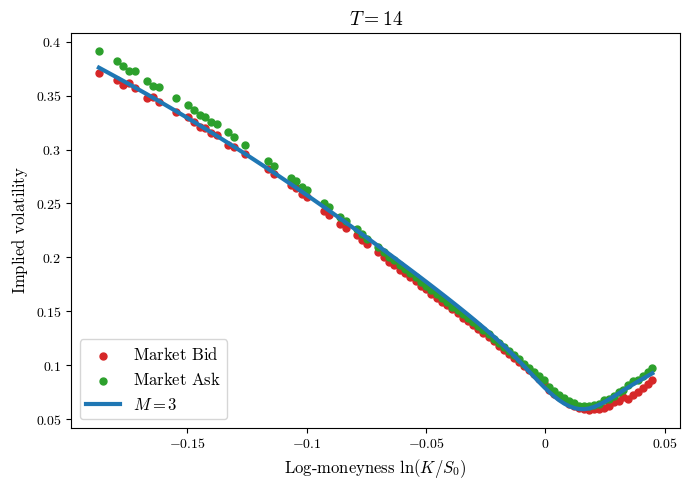

In [495]:
plot_IV(SPX_, result_DE.x, x, M, L, n, T, save=False)

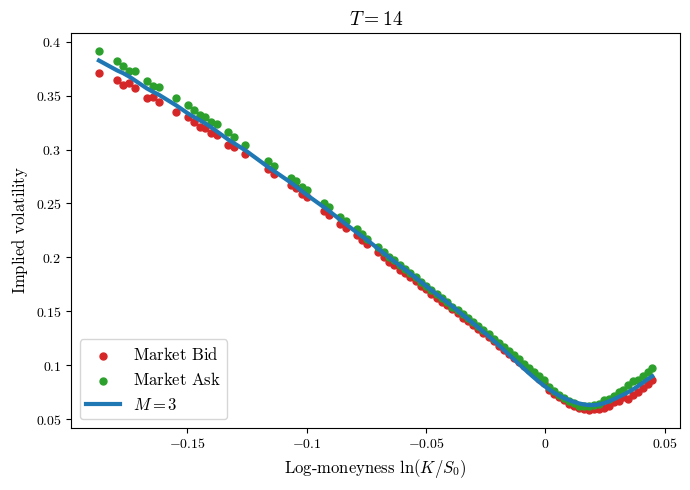

In [501]:
plot_IV(SPX_, result_NM.x, x, M, L, n, T, save=True)

In [499]:
result_NM.x

array([-5.88444479,  0.47840899, -2.05225864, -4.06712944, -5.50830681,
        4.54815622,  2.33491788,  1.35916519,  3.13268722, -2.84625734,
       -2.50420711, -2.41361178, -4.49542947,  7.63440372, -0.90074265])

#### V.3.3. $T = 35$ days

In [505]:
SPX_ = SPX[SPX["TimeToExpiration"] == 35]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.15] # to avoid outliers
SPX_ = SPX_[SPX_["Logmoneyness"] < 0.055]

ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(ivs_market)

x = 0.1204
M = 3
n = 100
L = 45
T = np.array(SPX_["Maturity"])[0]

bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-0.8, 0.8))
bounds.append((-1, -0.1))

maxiter = 100
popsize = 15

In [ ]:
result_DE, result_NM =  calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=False)

In [527]:
result_DE.x, result_NM.x

(array([-0.79924806,  0.16296648,  0.38941041,  0.75985604,  0.57189178,
         0.79539537,  0.71322301, -0.39896071, -0.60868111,  0.16294787,
        -0.2872863 ,  0.7488449 ,  0.46087087,  0.79634401, -0.99130823]),
 array([-1.05951673,  0.46302254,  2.21241253, -1.39589214, -7.28301348,
         0.95671649, -1.51405274,  0.47579559,  1.40432398,  0.71699203,
        -1.42585529,  2.20658895, -1.08450682,  1.86930946, -0.96816593]))

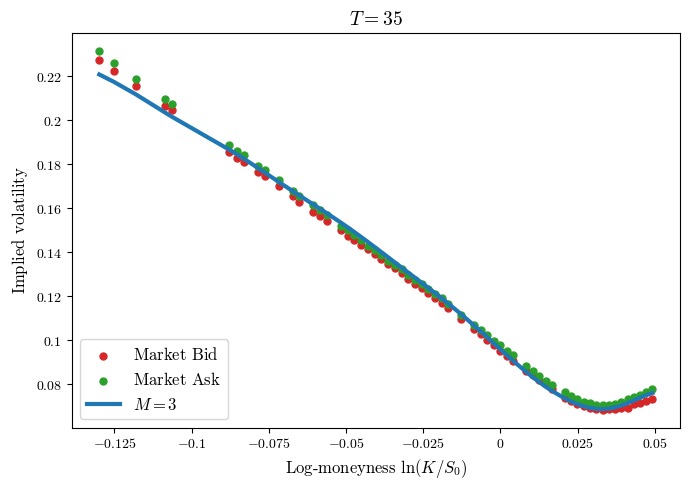

In [529]:
plot_IV(SPX_, result_DE.x, x, M, L, n, T, save=False)

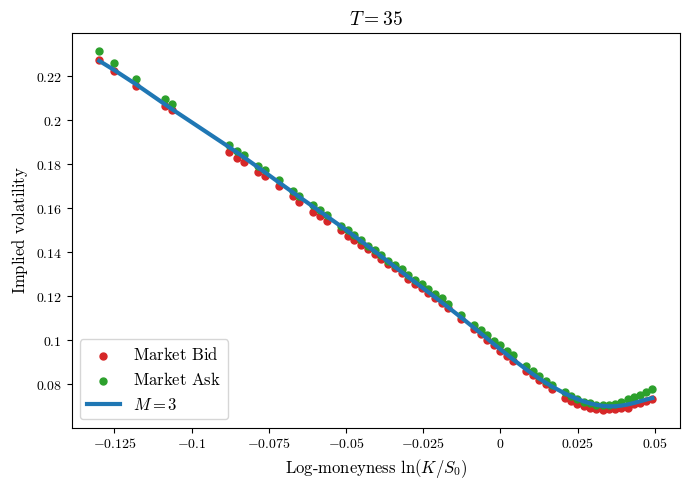

In [533]:
plot_IV(SPX_, result_NM.x, x, M, L, n, T, save=True)

In [ ]:
"""
result_DE.x, result_NM.x
(array([-0.75173561,  0.20107862, -0.40479985, -0.43882894,  0.35350996,
         0.8       , -0.62086509,  0.13420563,  0.66728975, -0.00535555,
         0.69845859,  0.45840732,  0.09331202,  0.76981137, -0.99954778]),
 array([-0.79347173,  0.32471255, -0.74540269, -2.66595978, -2.65529768,
         0.92986229, -0.663305  , -0.31110601, 16.01429079, -0.02163866,
        -0.71255813, -3.00872725, -0.42050222,  1.96743662, -0.97477466]))
"""

#### V.3.4. $T = 73$ days 

In [563]:
SPX_ = SPX[SPX["TimeToExpiration"] == 73]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.21] # to avoid outliers

ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(ivs_market) 

x = 0.1204
M = 3
n = 100
L = 45
T = np.array(SPX_["Maturity"])[0]

bounds = []
for _ in range(2**(M+1) - 2) : 
    bounds.append((-0.8, 0.8))
bounds.append((-1, -0.1))

maxiter = 100
popsize = 15

In [ ]:
result_DE, result_NM =  calibration_procedure(maxiter, popsize, bounds, logmoneyness, ivs_market, vegas_market, x, M, L, n, T, polish=False)

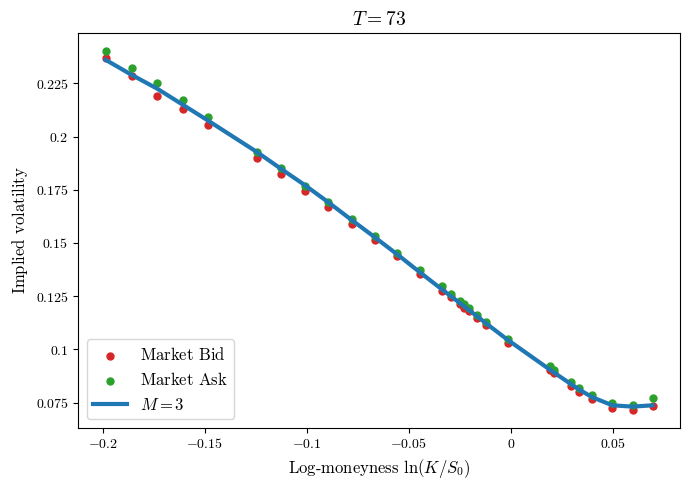

In [571]:
plot_IV(SPX_, result_DE.x, x, M, L, n, T, save=False)

In [573]:
result_DE.x

array([-0.7736143 ,  0.32602811, -0.48073472,  0.42988758, -0.47373311,
        0.44546641,  0.19418266, -0.7029492 ,  0.02445649, -0.58413923,
       -0.41188272,  0.11367072,  0.14519638, -0.02839108, -0.82375667])

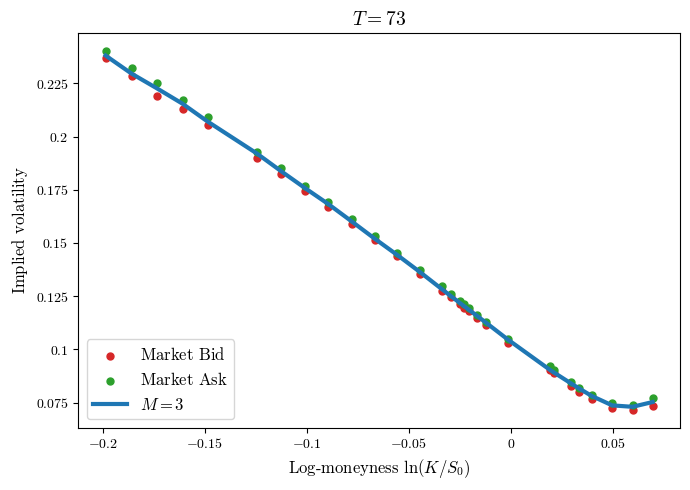

In [577]:
plot_IV(SPX_, result_NM.x, x, M, L, n, T, save=True)

In [579]:
result_NM.x

array([-0.91770737,  0.3056592 , -0.46945037,  0.4096152 ,  0.15332408,
        0.41501911,  0.47941213, -1.85355443,  0.05984042, -0.67819113,
       -0.15253199,  0.40250318, -0.05064233,  0.01739406, -0.95942657])

#### V.3.5. Common figure

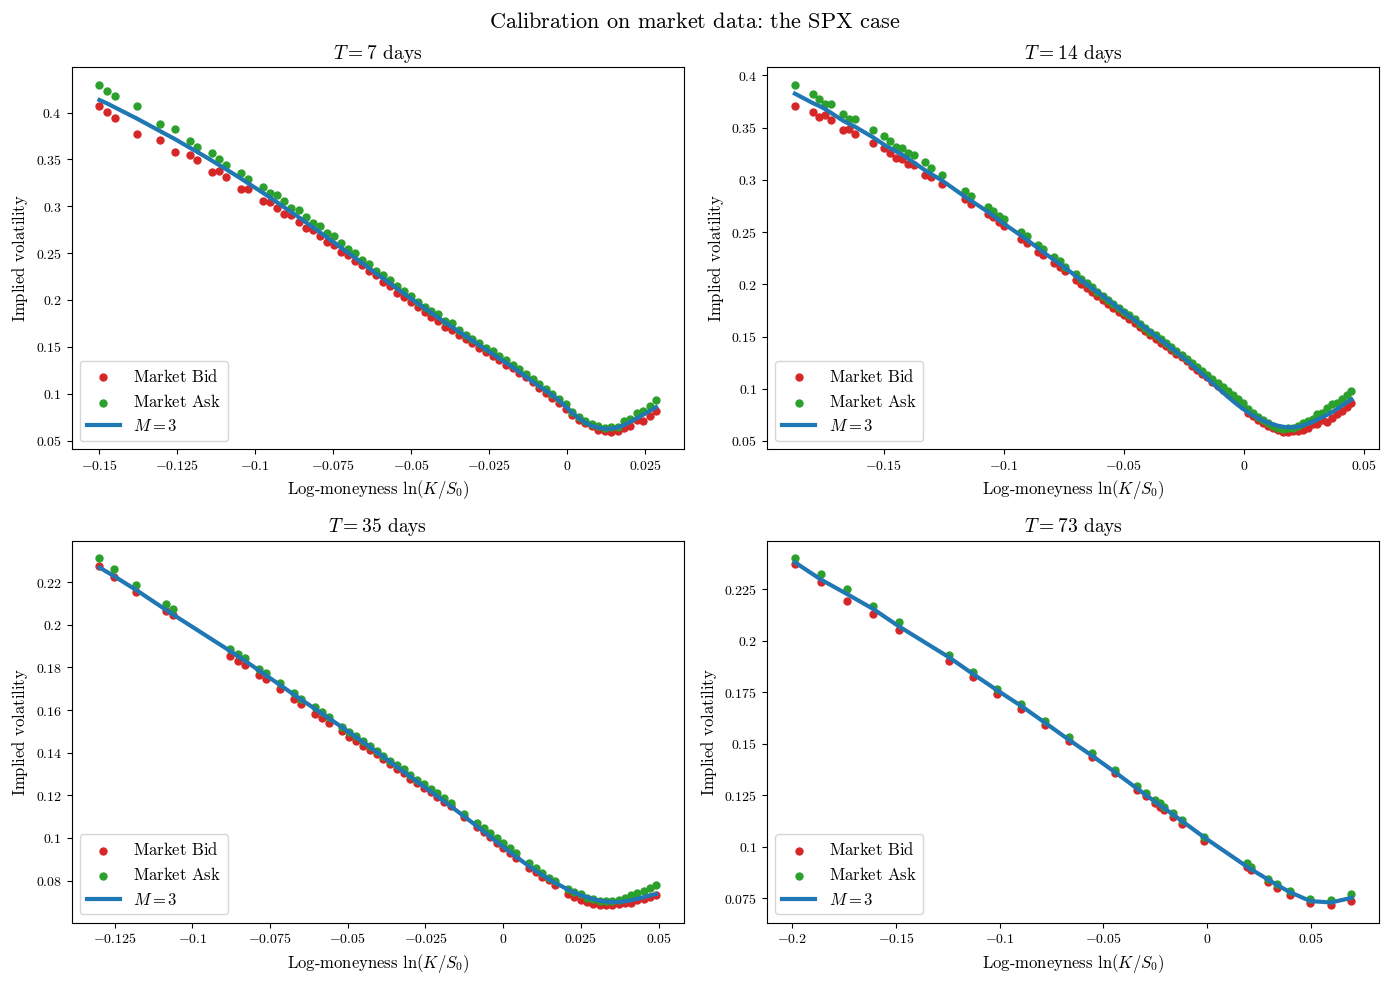

In [831]:
fig, ax = plt.subplots(2, 2, figsize=(7*2, 5*2))
ax = ax.flatten() 

SPX_ = SPX[SPX["TimeToExpiration"] == 7]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.155] # to avoid outliers
SPX_ = SPX_[SPX_["Logmoneyness"] < 0.03]
ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(logmoneyness) 
x = 0.1204
M = 3
n = 100
L = 160
T = np.array(SPX_["Maturity"])[0]
theta = np.array([-1.11090329e+01,  9.02498015e-01,  7.24298581e+00, -2.18768051e+01,
       -5.80765897e+01,  8.48592250e+00,  8.52193283e+00, -1.29333848e-01,
       -5.51958888e-02,  4.09734939e+01, -2.22484438e+00, -8.16654387e-01,
        1.55770972e+01,  2.72864125e+01, -8.38266027e-01])
l = theta[:-1]
rho = theta[-1]
u, sigma, sigma_2, projectors, tuples = offline_procedure(l, x, M, L, n)
sigma_BS = get_sigma_BS(l, x, M, L, n, T, rho)
psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
ivs_sig, penalty = compute_IV_Sig_and_penalty(logmoneyness, T, S0=1.0, psi=psi, sigma_BS=sigma_BS)
ax[0].scatter(SPX_["Logmoneyness"], SPX_["IV_Bid"], marker ="o", color = "tab:red", label = r"$\text{Market Bid}$", s = 25)
ax[0].scatter(SPX_["Logmoneyness"], SPX_["IV_Ask"], marker ="o", color = "tab:green", label = r"$\text{Market Ask}$", s = 25)
ax[0].plot(SPX_["Logmoneyness"], ivs_sig, color = "tab:blue", lw=3, label = r"$M=3$")
ax[0].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax[0].set_ylabel(r"$\text{Implied volatility}$", fontsize=12)
ax[0].set_title(r"$T = 7\text{ days}$", fontsize=14)
ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=12, loc = "lower left")


SPX_ = SPX[SPX["TimeToExpiration"] == 14]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.20] # to avoid outliers
SPX_ = SPX_[SPX_["Logmoneyness"] < 0.045]
ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(logmoneyness) 
x = 0.1204
M = 3
n = 100
L = 128
T = np.array(SPX_["Maturity"])[0]
theta = np.array([-5.88444479,  0.47840899, -2.05225864, -4.06712944, -5.50830681,
        4.54815622,  2.33491788,  1.35916519,  3.13268722, -2.84625734,
       -2.50420711, -2.41361178, -4.49542947,  7.63440372, -0.90074265])
l = theta[:-1]
rho = theta[-1]
u, sigma, sigma_2, projectors, tuples = offline_procedure(l, x, M, L, n)
sigma_BS = get_sigma_BS(l, x, M, L, n, T, rho)
psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
ivs_sig, penalty = compute_IV_Sig_and_penalty(logmoneyness, T, S0=1.0, psi=psi, sigma_BS=sigma_BS)
ax[1].scatter(SPX_["Logmoneyness"], SPX_["IV_Bid"], marker ="o", color = "tab:red", label = r"$\text{Market Bid}$", s = 25)
ax[1].scatter(SPX_["Logmoneyness"], SPX_["IV_Ask"], marker ="o", color = "tab:green", label = r"$\text{Market Ask}$", s = 25)
ax[1].plot(SPX_["Logmoneyness"], ivs_sig, color = "tab:blue", lw=3, label = r"$M=3$")
ax[1].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax[1].set_ylabel(r"$\text{Implied volatility}$", fontsize=12)
ax[1].set_title(r"$T = 14\text{ days}$", fontsize=14)
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=12, loc = "lower left")


SPX_ = SPX[SPX["TimeToExpiration"] == 35]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.15] # to avoid outliers
SPX_ = SPX_[SPX_["Logmoneyness"] < 0.055]
ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
vegas_market = np.array(SPX_["Vega"])
vegas_market = np.ones_like(ivs_market)
x = 0.1204
M = 3
n = 100
L = 45
T = np.array(SPX_["Maturity"])[0]
theta = np.array([-1.05951673,  0.46302254,  2.21241253, -1.39589214, -7.28301348,
         0.95671649, -1.51405274,  0.47579559,  1.40432398,  0.71699203,
        -1.42585529,  2.20658895, -1.08450682,  1.86930946, -0.96816593])
l = theta[:-1]
rho = theta[-1]
u, sigma, sigma_2, projectors, tuples = offline_procedure(l, x, M, L, n)
sigma_BS = get_sigma_BS(l, x, M, L, n, T, rho)
psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
ivs_sig, penalty = compute_IV_Sig_and_penalty(logmoneyness, T, S0=1.0, psi=psi, sigma_BS=sigma_BS)
ax[2].scatter(SPX_["Logmoneyness"], SPX_["IV_Bid"], marker ="o", color = "tab:red", label = r"$\text{Market Bid}$", s = 25)
ax[2].scatter(SPX_["Logmoneyness"], SPX_["IV_Ask"], marker ="o", color = "tab:green", label = r"$\text{Market Ask}$", s = 25)
ax[2].plot(SPX_["Logmoneyness"], ivs_sig, color = "tab:blue", lw=3, label = r"$M=3$")
ax[2].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax[2].set_ylabel(r"$\text{Implied volatility}$", fontsize=12)
ax[2].set_title(r"$T = 35\text{ days}$", fontsize=14)
ax[2].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[2].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[2].legend(fontsize=12, loc = "lower left")


SPX_ = SPX[SPX["TimeToExpiration"] == 73]
SPX_ = SPX_[SPX_["Logmoneyness"] > -0.21]
ivs_market = np.array(SPX_["IV_Mid"])
logmoneyness = np.array(SPX_["Logmoneyness"])
x = 0.1204
M = 3
n = 100
L = 45
T = np.array(SPX_["Maturity"])[0]
theta = np.array([-0.91770737,  0.3056592 , -0.46945037,  0.4096152 ,  0.15332408,
        0.41501911,  0.47941213, -1.85355443,  0.05984042, -0.67819113,
       -0.15253199,  0.40250318, -0.05064233,  0.01739406, -0.95942657])
l = theta[:-1]
rho = theta[-1]
u, sigma, sigma_2, projectors, tuples = offline_procedure(l, x, M, L, n)
sigma_BS = get_sigma_BS(l, x, M, L, n, T, rho)
psi = compute_psi_char_func(T, rho, u, sigma, sigma_2, projectors, tuples)
ivs_sig, penalty = compute_IV_Sig_and_penalty(logmoneyness, T, S0=1.0, psi=psi, sigma_BS=sigma_BS)
ax[3].scatter(SPX_["Logmoneyness"], SPX_["IV_Bid"], marker ="o", color = "tab:red", label = r"$\text{Market Bid}$", s = 25)
ax[3].scatter(SPX_["Logmoneyness"], SPX_["IV_Ask"], marker ="o", color = "tab:green", label = r"$\text{Market Ask}$", s = 25)
ax[3].plot(SPX_["Logmoneyness"], ivs_sig, color = "tab:blue", lw=3, label = r"$M=3$")
ax[3].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax[3].set_ylabel(r"$\text{Implied volatility}$", fontsize=12)
ax[3].set_title(r"$T = 73\text{ days}$", fontsize=14)
ax[3].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[3].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[3].legend(fontsize=12, loc = "lower left")

fig.suptitle(r"$\text{Calibration on market data: the SPX case}$", fontsize=16)
plt.tight_layout()
plt.show()

## VI. Asian options

Geometric Asian options on the average $\frac{1}{T} \int_0^T \log S_s \,d s$ can be recovered by setting $f(s) := iu \frac{T-s}{T}$, since 
        \begin{align}
            \int_t^T f(s) \,d \log S_s &
            = iu \int_t^T \frac{T-s}{T} \,d \log S_s
            = iu \frac{1}{T} \int_t^T \log S_s \,d s - iu \frac{T-t}{T} \log S_t.
        \end{align}
Consequently, 
\begin{align*}
\bar\phi_t(u) &= \exp\left(\left\langle \boldsymbol\psi_t, \widehat{\mathbb{W}}_t\right\rangle + iu \frac{T-t}{T}\log S_t\right) = \bar M_t(u)e^{-iu\log \bar S_t}, \quad \bar S_t := \exp\left(\frac1T\int_0^t \log S_s\, ds\right), \quad \bar S_0 = 1.
\end{align*}

### V.I. Relevance of the control variate

In [44]:
T = 1
N_mc = 100000
n_mc = 252
S0 = 1
x, kappa, theta, eta, rho = 0.25, 1, 0.25, 1.2, -0.9

logmoneyness_2 = np.linspace(-0.44, 0.21, 50)
strikes = S0 * np.exp(logmoneyness_2)
Z = simulate_antithetic(N_mc, n_mc, d=2, rng=rng)
S, sigma = simulate_SteinStein(N_mc, n_mc, T, S0, x, kappa, theta, eta, rho, Z) 
integrals = last_integrale(S, T)
bar_S = np.exp(integrals) 

M = 4
n = 100
L = 16

bell = compute_l_OU(x, kappa, theta, eta, M) 
u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L, n) 
psi = compute_psi_char_func_asian(T, rho, u, sigma, sigma_2, projectors, tuples)
psi_1j = np.real(compute_psi_1j_asian(bell, x, M, n, T, rho))
sigma_BS = get_sigma_BS_asian(bell, x, M, L, n, T, rho, S0)

In [45]:
price_mid = []
price_lower = []
price_upper = []
price_sig = []
price_sig_CV = [] 
for K in strikes : 
    price, _, lower, upper = monte_carlo(np.maximum(K - bar_S, 0.0))
    price_mid.append(price)
    price_lower.append(lower)
    price_upper.append(upper)
    sig = compute_asian_Fourier(psi, psi_1j, S0, K, flag="put")
    sig_CV = compute_asian_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = sigma_BS, flag="put")
    price_sig.append(sig)
    price_sig_CV.append(sig_CV)

price_mid = np.array(price_mid)
price_lower = np.array(price_lower)
price_upper = np.array(price_upper)
price_sig = np.array(price_sig)
price_sig_CV = np.array(price_sig_CV)

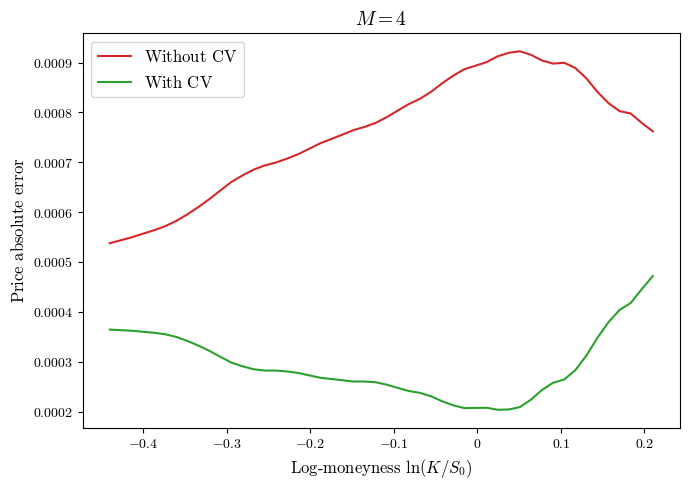

In [46]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(logmoneyness_2, np.abs(price_mid - price_sig[:, 0]), color = "tab:red", label = r"$\text{Without CV}$")
ax.plot(logmoneyness_2, np.abs(price_mid - price_sig_CV), color = "tab:green", label = r"$\text{With CV}$")

ax.set_xlabel(r"$\text{Log-moneyness } \ln (K/S_0)$", fontsize=12)
ax.set_ylabel(r"$\text{Price absolute error}$", fontsize=12)
ax.set_title(r"$M=4$", fontsize=14)
ax.xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax.yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

### VI.2. Smiles

In [55]:
T = 1/52
N_mc = 1000000
n_mc = 252
S0 = 1
x, kappa, theta, eta, rho = 0.25, 1, 0.25, 1.2, -0.9

logmoneyness_1 = np.linspace(-0.042, 0.019, 50)
strikes = S0 * np.exp(logmoneyness_1)
Z = simulate_antithetic(N_mc, n_mc, d=2, rng=rng)
S, sigma = simulate_SteinStein(N_mc, n_mc, T, S0, x, kappa, theta, eta, rho, Z) 
integrals = last_integrale(S, T)
bar_S = np.exp(integrals) 

M = 4
n = 100
L = 48

bell = compute_l_OU(x, kappa, theta, eta, M) 
u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L, n) 
psi = compute_psi_char_func_asian(T, rho, u, sigma, sigma_2, projectors, tuples)
psi_1j = np.real(compute_psi_1j_asian(bell, x, M, n, T, rho))
sigma_BS = get_sigma_BS_asian(bell, x, M, L, n, T, rho, S0)

In [57]:
iv_mid_1 = []
iv_lower_1 = []
iv_upper_1 = []
iv_sig_1 = []
iv_sig_1_CV = []
for K in strikes : 
    price, _, price_lower, price_upper = monte_carlo(np.maximum(K - bar_S, 0.0))
    iv_mid_1.append(compute_asian_IV_MC(price, S0, K, T, option_type='put'))
    iv_lower_1.append(compute_asian_IV_MC(price_lower, S0, K, T, option_type='put'))
    iv_upper_1.append(compute_asian_IV_MC(price_upper, S0, K, T, option_type='put'))
    price_sig = compute_asian_Fourier(psi, psi_1j, S0, K, flag="put")
    iv_sig_1.append(compute_asian_IV_MC(price_sig, S0, K, T, option_type='put'))
    price_sig_CV = compute_asian_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = sigma_BS, flag="put")
    iv_sig_1_CV.append(compute_asian_IV_MC(price_sig_CV, S0, K, T, option_type='put'))

In [59]:
T = 1
N_mc = 1000000
n_mc = 252
S0 = 1
x, kappa, theta, eta, rho = 0.25, 1, 0.25, 1.2, -0.9

logmoneyness_2 = np.linspace(-0.44, 0.21, 50)
strikes = S0 * np.exp(logmoneyness_2)
Z = simulate_antithetic(N_mc, n_mc, d=2, rng=rng)
S, sigma = simulate_SteinStein(N_mc, n_mc, T, S0, x, kappa, theta, eta, rho, Z) 
integrals = last_integrale(S, T)
bar_S = np.exp(integrals) 

M = 4
n = 100
L = 16

bell = compute_l_OU(x, kappa, theta, eta, M) 
u, sigma, sigma_2, projectors, tuples = offline_procedure(bell, x, M, L, n) 
psi = compute_psi_char_func_asian(T, rho, u, sigma, sigma_2, projectors, tuples)
psi_1j = np.real(compute_psi_1j_asian(bell, x, M, n, T, rho))
sigma_BS = get_sigma_BS_asian(bell, x, M, L, n, T, rho, S0)

In [65]:
iv_mid_2 = []
iv_lower_2 = []
iv_upper_2 = []
iv_sig_2 = []
iv_sig_2_CV = []
for K in strikes : 
    price, _, price_lower, price_upper = monte_carlo(np.maximum(K - bar_S, 0.0))
    iv_mid_2.append(compute_asian_IV_MC(price, S0, K, T, option_type='put'))
    iv_lower_2.append(compute_asian_IV_MC(price_lower, S0, K, T, option_type='put'))
    iv_upper_2.append(compute_asian_IV_MC(price_upper, S0, K, T, option_type='put'))
    price_sig = compute_asian_Fourier(psi, psi_1j, S0, K, flag="put")
    iv_sig_2.append(compute_asian_IV_MC(price_sig, S0, K, T, option_type='put'))
    price_sig_CV = compute_asian_Fourier_with_control_variate(psi, S0, K, T, sigma_BS = sigma_BS, flag="put")
    iv_sig_2_CV.append(compute_asian_IV_MC(price_sig_CV, S0, K, T, option_type='put'))

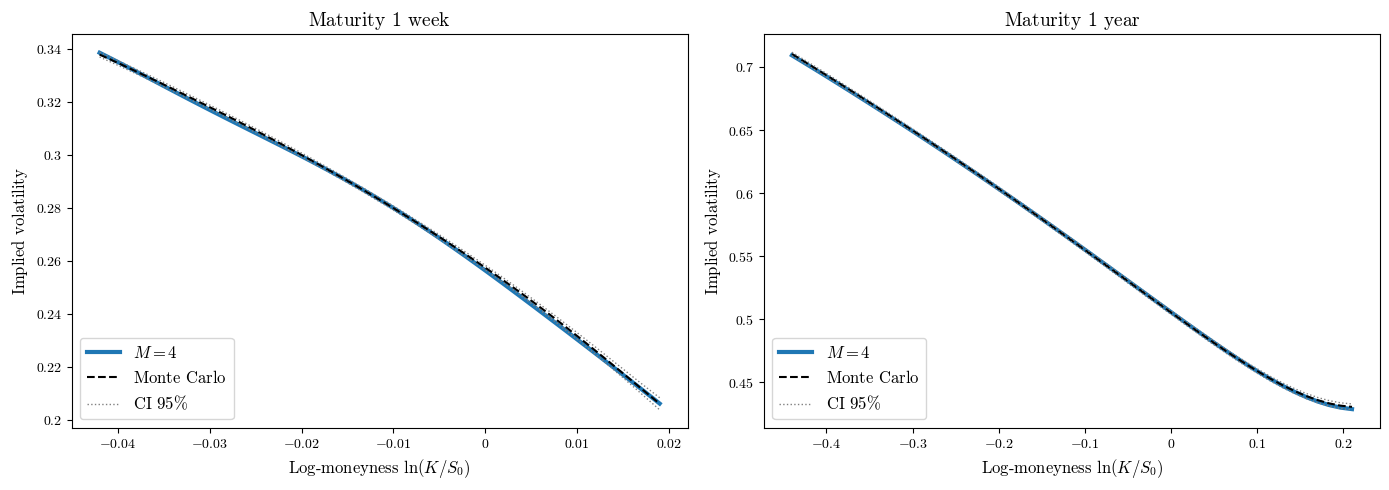

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(7*2, 5))

ax[0].plot(logmoneyness_1, iv_sig_1_CV, color = "tab:blue", lw = 3, label = r"$M=4$")
ax[0].plot(logmoneyness_1, iv_mid_1, color = "black", linestyle = "--", label = r"$\text{Monte Carlo}$")
ax[0].plot(logmoneyness_1, iv_lower_1, color = "gray", linestyle =":", lw = 1, label = r"$\text{CI } 95\%$")
ax[0].plot(logmoneyness_1, iv_upper_1, color = "gray", linestyle =":", lw = 1) 

ax[0].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax[0].set_ylabel(r"$\text{Implied volatility}$", fontsize=12)
ax[0].set_title(r"$\text{Maturity 1 week}$", fontsize=14)
ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=12, loc = "lower left")

ax[1].plot(logmoneyness_2, iv_sig_2_CV, color = "tab:blue", lw = 3, label = r"$M=4$")
ax[1].plot(logmoneyness_2, iv_mid_2, color = "black", linestyle = "--", label = r"$\text{Monte Carlo}$")
ax[1].plot(logmoneyness_2, iv_lower_2, color = "gray", linestyle =":", lw = 1, label = r"$\text{CI } 95\%$")
ax[1].plot(logmoneyness_2, iv_upper_2, color = "gray", linestyle =":", lw = 1) 

ax[1].set_xlabel(r"$\text{Log-moneyness } \ln(K/S_0)$", fontsize=12)
ax[1].set_ylabel(r"$\text{Implied volatility}$", fontsize=12)
ax[1].set_title(r"$\text{Maturity 1 year}$", fontsize=14)
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=12, loc = "lower left")

plt.tight_layout()
plt.show()